# Imports

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link="https://drive.google.com/open?id=1wJKaqnSnnPskuUzH9BJPKl0oZh3yluIz"
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('10681189_LivingRoom_CLEAN_Round1_ReadyforModeling (1).csv')

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link="https://drive.google.com/open?id=1dwGLZBTx_iQYbPJnxYFwtJqEODqmLXWg"
fluff, id = link.split('=')
downloaded2 = drive.CreateFile({'id':id})
downloaded2.GetContentFile('BDL_Dec2018 (1).csv')

In [909]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [0]:
X = pd.read_csv('/content/drive/My Drive/OPIM 5512/Assignment 4/BDL_Dec2018 (1).csv')

In [0]:
Y = pd.read_csv('/content/drive/My Drive/OPIM 5512/Assignment 4/10681189_LivingRoom_CLEAN_Round1_ReadyforModeling (1).csv')

# EDA

In [0]:
#Make three interesting plots (5 pts each, 15 pts total)

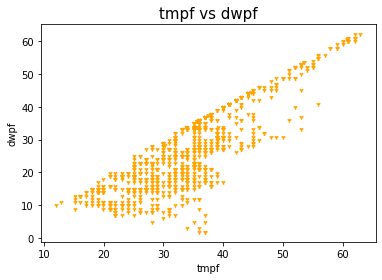

In [914]:
X.plot.scatter(x='tmpf', y='dwpf', marker="1", color="orange")#a strong correlation can be seen with tmpf and dwpf
plt.title('tmpf vs dwpf', fontsize=15)
fig.tight_layout()

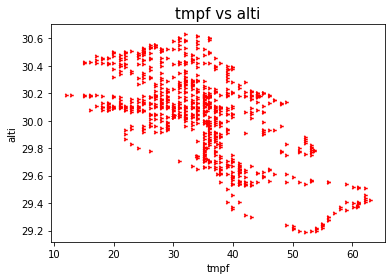

In [915]:
X.plot.scatter(x='tmpf', y='alti', marker="4", color="red")#a somewhat decent negative trend with tmpf and alti
plt.title('tmpf vs alti', fontsize=15)
fig.tight_layout()

Text(0.5, 1.0, 'tmpf KDE/Histogram')

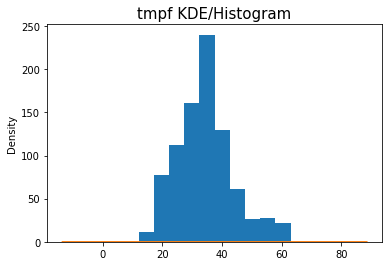

In [916]:
X['tmpf'].plot.hist()
X['tmpf'].plot.kde()#hist is interesting but the kde is not
plt.title('tmpf KDE/Histogram', fontsize=15)

In [0]:
#Make two interesting tables (5 pts each, 10 pts total)

In [918]:
X.describe()#Can see that there is a lot of data on the start, but not much towards the end
#X has a lot of NaNs that will need to be cleaned for models

,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyl1,skyl2,skyl3,skyl4,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,feel
count,8.816000e+03,8.816000e+03,869.000000,868.000000,868.000000,8632.000000,8801.000000,1467.000000,8816.000000,720.000000,8816.000000,280.000000,5217.000000,2019.000000,555.000000,20.000000,20.000000,2.000000,4.000000,38.000000,38.000000,868.000000
mean,-7.268250e+01,4.193810e+01,34.425201,26.610023,75.039931,194.076691,6.282354,0.022360,30.060877,1018.707917,8.926412,20.346429,3961.841480,5614.438831,7204.945946,22750.000000,0.001090,0.005050,0.005050,30.605263,270.789474,29.520553
std,4.064535e-12,7.880366e-12,9.416154,12.653881,19.129321,133.208597,4.674026,0.050432,0.285968,9.880073,2.502697,4.166515,3945.806181,5597.562484,6546.481470,3958.668038,0.003047,0.007000,0.005716,3.809941,67.559046,11.159049
min,-7.268250e+01,4.193810e+01,12.000000,1.900000,22.260000,0.000000,0.000000,0.000000,29.170000,988.500000,0.250000,14.000000,100.000000,300.000000,800.000000,13000.000000,0.000100,0.000100,0.000100,26.000000,160.000000,6.320000
25%,-7.268250e+01,4.193810e+01,28.000000,17.100000,59.650000,20.000000,3.000000,0.000000,29.930000,1014.250000,10.000000,18.000000,1300.000000,1800.000000,2550.000000,21500.000000,0.000100,0.002575,0.000100,27.250000,172.500000,21.930000
50%,-7.268250e+01,4.193810e+01,35.100000,25.000000,75.220000,220.000000,6.000000,0.000100,30.100000,1019.500000,10.000000,19.000000,3500.000000,4500.000000,5000.000000,25000.000000,0.000100,0.005050,0.005050,30.000000,300.000000,28.370000
75%,-7.268250e+01,4.193810e+01,39.000000,34.000000,92.780000,310.000000,9.000000,0.020000,30.210000,1024.125000,10.000000,23.000000,4800.000000,6000.000000,7999.000000,25000.000000,0.000100,0.007525,0.010000,33.750000,320.000000,35.055000
max,-7.268250e+01,4.193810e+01,63.000000,62.100000,100.000000,360.000000,26.000000,0.550000,30.630000,1037.300000,10.000000,38.000000,25000.000000,25000.000000,25000.000000,25000.000000,0.010000,0.010000,0.010000,39.000000,350.000000,63.000000


In [919]:
X.groupby(['tmpf']).describe()#Get to see how temperature groupings, which is a neat way of getting the unique values of tmpf, change different variables

lon                                  ...     feel                        
     count     mean           std      min  ...      25%     50%      75%    max
tmpf                                        ...                                 
12.0   1.0 -72.6825           NaN -72.6825  ...  12.0000  12.000  12.0000  12.00
12.9   1.0 -72.6825           NaN -72.6825  ...  12.9000  12.900  12.9000  12.90
15.1   4.0 -72.6825  0.000000e+00 -72.6825  ...   6.3200   7.845  10.8025  15.10
16.0   5.0 -72.6825  0.000000e+00 -72.6825  ...  10.4000  16.000  16.0000  16.00
17.1   5.0 -72.6825  0.000000e+00 -72.6825  ...  10.0200  11.660  11.6600  17.10
18.0   9.0 -72.6825  0.000000e+00 -72.6825  ...   8.6700  11.070  12.6800  18.00
19.0  15.0 -72.6825  1.470963e-14 -72.6825  ...  12.2400  13.830  19.0000  19.00
19.9  15.0 -72.6825  1.470963e-14 -72.6825  ...  12.0300  13.290  19.9000  19.90
21.0  17.0 -72.6825  0.000000e+00 -72.6825  ...  12.2800  14.570  16.1100  21.00
21.9  16.0 -72.6825  0.000000e+00 -72.6825  ...  11.4925  14.400  17.1400  21.90
23.0  15.0 -72.6825  1.470963e-14 -72.6825  ...  12.3200  15.710  20.7000  23.00
24.1  17.0 -72.6825  0.000000e+00 -72.6825  ...  16.0200  18.190  24.1000  24.10
25.0  33.0 -72.6825  5.772476e-14 -72.6825  ...  17.1000  18.080  20.6900  25.00
26.1  24.0 -72.6825  4.354950e-14 -72.6825  ...  18.2125  19.390  20.5300  26.10
27.0  23.0 -72.6825  2.906048e-14 -72.6825  ...  19.9850  20.460  22.9700  27.00
28.0  32.0 -72.6825  5.775297e-14 -72.6825  ...  21.2050  23.435  28.0000  28.00
28.9  29.0 -72.6825  5.784958e-14 -72.6825  ...  21.0000  22.710  25.1400  28.90
30.0  24.0 -72.6825  4.354950e-14 -72.6825  ...  24.8150  26.400  27.3000  30.00
30.2   1.0 -72.6825           NaN -72.6825  ...  26.6300  26.630  26.6300  26.63
30.9  30.0 -72.6825  5.781517e-14 -72.6825  ...  22.9300  25.090  27.4300  30.90
32.0  45.0 -72.6825  7.185717e-14 -72.6825  ...  24.1100  27.420  32.0000  32.00
33.1  35.0 -72.6825  5.767329e-14 -72.6825  ...  24.6150  26.860  28.7000  33.10
33.8   1.0 -72.6825           NaN -72.6825  ...  24.2900  24.290  24.2900  24.29
34.0  36.0 -72.6825  5.764975e-14 -72.6825  ...  25.4800  27.220  29.7600  34.00
35.1  61.0 -72.6825  8.597273e-14 -72.6825  ...  26.3800  27.930  30.0800  35.10
35.6   8.0 -72.6825  0.000000e+00 -72.6825  ...  29.0150  29.520  31.2025  32.80
36.0  53.0 -72.6825  8.608108e-14 -72.6825  ...  27.5200  29.650  32.0900  36.00
37.0  44.0 -72.6825  7.187574e-14 -72.6825  ...  28.7900  30.270  32.3300  37.00
37.4   2.0 -72.6825  0.000000e+00 -72.6825  ...  33.7300  33.730  33.7300  33.73
37.9  31.0 -72.6825  5.778304e-14 -72.6825  ...  30.1450  31.380  32.6400  37.90
39.0  26.0 -72.6825  4.347686e-14 -72.6825  ...  31.8675  34.710  36.6900  39.00
39.2   2.0 -72.6825  0.000000e+00 -72.6825  ...  36.0125  37.075  38.1375  39.20
39.9  30.0 -72.6825  5.781517e-14 -72.6825  ...  33.8400  35.780  39.9000  39.90
41.0  26.0 -72.6825  4.347686e-14 -72.6825  ...  37.2925  38.980  41.0000  41.00
42.1  15.0 -72.6825  1.470963e-14 -72.6825  ...  38.0400  39.210  39.7200  42.10
43.0  17.0 -72.6825  0.000000e+00 -72.6825  ...  38.1900  39.460  40.2700  43.00
44.1  16.0 -72.6825  0.000000e+00 -72.6825  ...  39.5300  40.100  41.5500  44.10
44.6   1.0 -72.6825           NaN -72.6825  ...  40.7100  40.710  40.7100  40.71
45.0  16.0 -72.6825  0.000000e+00 -72.6825  ...  38.8050  41.830  42.6000  45.00
46.0   7.0 -72.6825  0.000000e+00 -72.6825  ...  40.9200  41.840  46.0000  46.00
46.9   4.0 -72.6825  0.000000e+00 -72.6825  ...  42.3700  44.920  46.9000  46.90
48.0   5.0 -72.6825  0.000000e+00 -72.6825  ...  43.8200  44.800  46.1000  46.10
48.9   6.0 -72.6825  0.000000e+00 -72.6825  ...  45.6525  46.815  47.1600  48.90
50.0   4.0 -72.6825  0.000000e+00 -72.6825  ...  45.2100  45.555  46.7425  49.27
51.1   5.0 -72.6825  0.000000e+00 -72.6825  ...  51.1000  51.100  51.1000  51.10
52.0   7.0 -72.6825  0.000000e+00 -72.6825  ...  52.0000  52.000  52.0000  52.00
53.1  11.0 -72.6825  0.000000e+00 -72.

# Prepare The Data

In [920]:
X.head()

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
0,BDL,12/1/2018 0:00,-72.6825,41.9381,NaN,NaN,NaN,310.0,3.0,NaN,30.1,NaN,5.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KBDL 010500Z AUTO 31003KT 5SM BR CLR M01/M02 A...
1,BDL,12/1/2018 0:05,-72.6825,41.9381,NaN,NaN,NaN,350.0,3.0,NaN,30.1,NaN,4.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KBDL 010505Z AUTO 35003KT 4SM BR CLR M02/M02 A...
2,BDL,12/1/2018 0:10,-72.6825,41.9381,NaN,NaN,NaN,0.0,0.0,NaN,30.1,NaN,5.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KBDL 010510Z AUTO 00000KT 5SM BR CLR M02/M02 A...
3,BDL,12/1/2018 0:15,-72.6825,41.9381,NaN,NaN,NaN,0.0,0.0,NaN,30.1,NaN,5.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KBDL 010515Z AUTO 00000KT 5SM BR CLR M02/M02 A...
4,BDL,12/1/2018 0:20,-72.6825,41.9381,NaN,NaN,NaN,0.0,0.0,NaN,30.1,NaN,5.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KBDL 010520Z AUTO 00000KT 5SM BR CLR M02/M02 A...


In [921]:
X.dtypes

station               object
valid                 object
lon                  float64
lat                  float64
tmpf                 float64
dwpf                 float64
relh                 float64
drct                 float64
sknt                 float64
p01i                 float64
alti                 float64
mslp                 float64
vsby                 float64
gust                 float64
skyc1                 object
skyc2                 object
skyc3                 object
skyc4                 object
skyl1                float64
skyl2                float64
skyl3                float64
skyl4                float64
wxcodes               object
ice_accretion_1hr    float64
ice_accretion_3hr    float64
ice_accretion_6hr    float64
peak_wind_gust       float64
peak_wind_drct       float64
peak_wind_time        object
feel                 float64
metar                 object
dtype: object

In [922]:
X = X[['valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp']]
X.head()

,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp
0,12/1/2018 0:00,NaN,NaN,NaN,310.0,3.0,NaN,30.1,NaN
1,12/1/2018 0:05,NaN,NaN,NaN,350.0,3.0,NaN,30.1,NaN
2,12/1/2018 0:10,NaN,NaN,NaN,0.0,0.0,NaN,30.1,NaN
3,12/1/2018 0:15,NaN,NaN,NaN,0.0,0.0,NaN,30.1,NaN
4,12/1/2018 0:20,NaN,NaN,NaN,0.0,0.0,NaN,30.1,NaN


In [923]:
Y.head()
#looks like date/time and temp are already there so no need to partition
#ALSO THE DIRECTIONS WERE WRONG AT TIMES FOR ROW AN DCOLUMN COUNTS. I KNOW MY DATA WAS 100% PREPED PROPERLY

,DateTime,TempF
0,12/3/2018 14:53,68.691
1,12/3/2018 14:53,68.666
2,12/3/2018 14:54,68.659
3,12/3/2018 14:54,68.677
4,12/3/2018 14:55,68.693


In [924]:
X['valid'] = pd.to_datetime(X['valid'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
Y['DateTime'] = pd.to_datetime(Y['DateTime'])

In [926]:
X.head()

,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp
0,2018-12-01 00:00:00,NaN,NaN,NaN,310.0,3.0,NaN,30.1,NaN
1,2018-12-01 00:05:00,NaN,NaN,NaN,350.0,3.0,NaN,30.1,NaN
2,2018-12-01 00:10:00,NaN,NaN,NaN,0.0,0.0,NaN,30.1,NaN
3,2018-12-01 00:15:00,NaN,NaN,NaN,0.0,0.0,NaN,30.1,NaN
4,2018-12-01 00:20:00,NaN,NaN,NaN,0.0,0.0,NaN,30.1,NaN


In [927]:
Y.head()

,DateTime,TempF
0,2018-12-03 14:53:00,68.691
1,2018-12-03 14:53:00,68.666
2,2018-12-03 14:54:00,68.659
3,2018-12-03 14:54:00,68.677
4,2018-12-03 14:55:00,68.693


In [928]:
X.isnull().sum()

valid       0
tmpf     7947
dwpf     7948
relh     7948
drct      184
sknt       15
p01i     7349
alti        0
mslp     8096
dtype: int64

In [0]:
X = X.dropna(axis=0)

In [930]:
X.shape

(713, 9)

In [931]:
Y.isnull().sum()

DateTime        0
TempF       25493
dtype: int64

In [0]:
Y = Y.dropna(axis=0)

In [933]:
Y.shape

(41441, 2)

In [934]:
X.index = X['valid']
tmpX = X.resample('15T').mean()
tmpX.head()

,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp
valid,,,,,,,,
2018-12-01 00:45:00,28.0,28.0,100.0,300.0,3.0,0.0,30.11,1019.7
2018-12-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-01 01:45:00,28.0,28.0,100.0,300.0,5.0,0.0,30.12,1020.0


In [935]:
tmpX.shape

(2877, 8)

In [936]:
Y.index = Y['DateTime']
tmpY = Y.resample('15T').mean()
tmpY.head()

,TempF
DateTime,
2018-12-03 14:45:00,68.572000
2018-12-03 15:00:00,68.023533
2018-12-03 15:15:00,67.941900
2018-12-03 15:30:00,67.749733
2018-12-03 15:45:00,67.597500


In [937]:
tmpY.shape

(2232, 1)

In [0]:
merged = pd.merge(tmpY, tmpX, left_index=True, right_index=True)

In [0]:
merged = merged.reset_index()

In [0]:
merged = merged.rename(columns= {"index":"DateTime"})

In [941]:
merged.head()

,DateTime,TempF,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp
0,2018-12-03 14:45:00,68.572000,53.1,33.1,46.42,280.0,14.0,0.0,29.57,1001.3
1,2018-12-03 15:00:00,68.023533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-03 15:15:00,67.941900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-03 15:30:00,67.749733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-03 15:45:00,67.597500,50.0,30.9,47.64,280.0,11.0,0.0,29.59,1002.2


In [0]:
merged = merged.interpolate(axis=0)#same as interpolating columns. I checked it by interpolating columns individually

In [943]:
merged.shape

(2232, 10)

In [944]:
merged.isnull().sum()

DateTime    0
TempF       0
tmpf        0
dwpf        0
relh        0
drct        0
sknt        0
p01i        0
alti        0
mslp        0
dtype: int64

In [0]:
merged['hour']= merged['DateTime'].dt.hour

In [946]:
merged.head()

,DateTime,TempF,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,hour
0,2018-12-03 14:45:00,68.572000,53.100,33.10,46.420,280.0,14.00,0.0,29.570,1001.300,14
1,2018-12-03 15:00:00,68.023533,52.325,32.55,46.725,280.0,13.25,0.0,29.575,1001.525,15
2,2018-12-03 15:15:00,67.941900,51.550,32.00,47.030,280.0,12.50,0.0,29.580,1001.750,15
3,2018-12-03 15:30:00,67.749733,50.775,31.45,47.335,280.0,11.75,0.0,29.585,1001.975,15
4,2018-12-03 15:45:00,67.597500,50.000,30.90,47.640,280.0,11.00,0.0,29.590,1002.200,15


In [947]:
merged.dtypes

DateTime    datetime64[ns]
TempF              float64
tmpf               float64
dwpf               float64
relh               float64
drct               float64
sknt               float64
p01i               float64
alti               float64
mslp               float64
hour                 int64
dtype: object

In [0]:
merged2 = merged #make my life easy

# Lag Variables

In [0]:
def lag_var(df, n):
  '''
  df: put your dataframe
  n: the lags/ rows to apply to the dataframe (at least 1)
  '''
  new = df.copy()
  col= df.columns.to_list() # get columns name
  new_col = [s +"_"+str(n) for s in col] 
  new_col_list = dict(zip(col, new_col))
  new.rename(columns=new_col_list,inplace=True)
  new.loc[-n] = np.NaN  # adding a row
  new.index = new.index + n  # shifting index
  new = new.sort_index()
  new = new.iloc[:-n,:]
  return(new)

In [0]:
result = pd.concat([merged, lag_var(merged,1), lag_var(merged, 2), lag_var(merged, 3), lag_var(merged, 4), lag_var(merged, 5), lag_var(merged, 6), lag_var(merged, 7), lag_var(merged, 8), lag_var(merged, 9), lag_var(merged, 10), lag_var(merged, 11), lag_var(merged, 12), lag_var(merged, 13), lag_var(merged, 14), lag_var(merged, 15), lag_var(merged, 16)], axis = 1)

In [951]:
result = result.drop(result.index[0:16])
result

,DateTime,TempF,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,hour,DateTime_1,TempF_1,tmpf_1,dwpf_1,relh_1,drct_1,sknt_1,p01i_1,alti_1,mslp_1,hour_1,DateTime_2,TempF_2,tmpf_2,dwpf_2,relh_2,drct_2,sknt_2,p01i_2,alti_2,mslp_2,hour_2,DateTime_3,TempF_3,tmpf_3,dwpf_3,relh_3,drct_3,sknt_3,...,relh_13,drct_13,sknt_13,p01i_13,alti_13,mslp_13,hour_13,DateTime_14,TempF_14,tmpf_14,dwpf_14,relh_14,drct_14,sknt_14,p01i_14,alti_14,mslp_14,hour_14,DateTime_15,TempF_15,tmpf_15,dwpf_15,relh_15,drct_15,sknt_15,p01i_15,alti_15,mslp_15,hour_15,DateTime_16,TempF_16,tmpf_16,dwpf_16,relh_16,drct_16,sknt_16,p01i_16,alti_16,mslp_16,hour_16
16,2018-12-03 18:45:00,67.450167,45.00,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18,2018-12-03 18:30:00,67.562267,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,18.0,2018-12-03 18:15:00,67.889967,45.950,32.550,59.3850,260.0,5.50,0.0,29.6200,1003.050,18.0,2018-12-03 18:00:00,68.285467,46.425,32.275,57.6625,260.0,6.25,...,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0,2018-12-03 15:15:00,67.941900,51.550,32.000,47.0300,280.0,12.50,0.0,29.580,1001.750,15.0,2018-12-03 15:00:00,68.023533,52.325,32.550,46.7250,280.0,13.25,0.0,29.575,1001.525,15.0,2018-12-03 14:45:00,68.572000,53.100,33.100,46.4200,280.0,14.00,0.0,29.570,1001.300,14.0
17,2018-12-03 19:00:00,67.137567,45.25,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19,2018-12-03 18:45:00,67.450167,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18.0,2018-12-03 18:30:00,67.562267,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,18.0,2018-12-03 18:15:00,67.889967,45.950,32.550,59.3850,260.0,5.50,...,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0,2018-12-03 15:30:00,67.749733,50.775,31.450,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0,2018-12-03 15:15:00,67.941900,51.550,32.000,47.0300,280.0,12.50,0.0,29.580,1001.750,15.0,2018-12-03 15:00:00,68.023533,52.325,32.550,46.7250,280.0,13.25,0.0,29.575,1001.525,15.0
18,2018-12-03 19:15:00,66.601933,45.50,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,19,2018-12-03 19:00:00,67.137567,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19.0,2018-12-03 18:45:00,67.450167,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18.0,2018-12-03 18:30:00,67.562267,45.475,32.825,61.1075,260.0,4.75,...,48.1375,277.5,9.50,0.0,29.595,1002.300,16.0,2018-12-03 15:45:00,67.597500,50.000,30.900,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0,2018-12-03 15:30:00,67.749733,50.775,31.450,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0,2018-12-03 15:15:00,67.941900,51.550,32.000,47.0300,280.0,12.50,0.0,29.580,1001.750,15.0
19,2018-12-03 19:30:00,66.294467,45.75,33.775,62.7400,290.0,7.75,0.0,29.6375,1003.775,19,2018-12-03 19:15:00,66.601933,45.500,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,19.0,2018-12-03 19:00:00,67.137567,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19.0,2018-12-03 18:45:00,67.450167,45.000,33.100,62.8300,260.0,4.00,...,48.6350,275.0,8.00,0.0,29.600,1002.400,16.0,2018-12-03 16:00:00,67.429467,49.725,30.900,48.1375,277.5,9.50,0.0,29.595,1002.300,16.0,2018-12-03 15:45:00,67.597500,50.000,30.900,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0,2018-12-03 15:30:00,67.749733,50.775,31.450,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0
20,2018-12-03 19:45:00,66.135133,46.00,34.000,62.7100,300.0,9.00,0.0,29.6400,1003.900,19,2018-12-03 19:30:00,66.294467,45.750,33.775,62.7400,290.0,7.75,0.0,29.6375,1003.775,19.0,2018-12-03 19:15:00,66.601933,45.500,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,19.0,2018-12-03 19:00:00,67.137567,45.250,33.325,62.8000,270.0,5.25,...,49.1325,272.5,6.50,0.0,29.605,1002.500,16.0,2018-12-03 16:15:00,67.808667,49.450,30.900,48.6350,275.0,8.00,0.0,29.600,1002.400,16.0,2018-12-03 16:00:00,67.429467,49.725,30.900,48.1375,277.5,9.50,0.0,29.595,1002.300,16.0,2018-12-03 15:45:00,67.597500,50.000,30.900,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [952]:
result2 = result.drop(result.columns[[0,10,11,21,22,32,33,43,44,54,55,65,66,76,77,87,88,98,99,109,110,120,121,131,132,142,143,153,154,164,165,175,176,186]],axis = 1)
result2#2216 x 153

,TempF,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,TempF_1,tmpf_1,dwpf_1,relh_1,drct_1,sknt_1,p01i_1,alti_1,mslp_1,TempF_2,tmpf_2,dwpf_2,relh_2,drct_2,sknt_2,p01i_2,alti_2,mslp_2,TempF_3,tmpf_3,dwpf_3,relh_3,drct_3,sknt_3,p01i_3,alti_3,mslp_3,TempF_4,tmpf_4,dwpf_4,relh_4,...,sknt_12,p01i_12,alti_12,mslp_12,TempF_13,tmpf_13,dwpf_13,relh_13,drct_13,sknt_13,p01i_13,alti_13,mslp_13,TempF_14,tmpf_14,dwpf_14,relh_14,drct_14,sknt_14,p01i_14,alti_14,mslp_14,TempF_15,tmpf_15,dwpf_15,relh_15,drct_15,sknt_15,p01i_15,alti_15,mslp_15,TempF_16,tmpf_16,dwpf_16,relh_16,drct_16,sknt_16,p01i_16,alti_16,mslp_16
16,67.450167,45.00,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,67.562267,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,67.889967,45.950,32.550,59.3850,260.0,5.50,0.0,29.6200,1003.050,68.285467,46.425,32.275,57.6625,260.0,6.25,0.0,29.6150,1002.875,68.494867,46.900,32.000,55.9400,...,11.00,0.0,29.590,1002.20,67.749733,50.775,31.450,47.3350,280.0,11.75,0.0,29.585,1001.975,67.941900,51.550,32.000,47.0300,280.0,12.50,0.0,29.580,1001.750,68.023533,52.325,32.550,46.7250,280.0,13.25,0.0,29.575,1001.525,68.572000,53.100,33.100,46.4200,280.0,14.00,0.0,29.570,1001.300
17,67.137567,45.25,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,67.450167,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,67.562267,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,67.889967,45.950,32.550,59.3850,260.0,5.50,0.0,29.6200,1003.050,68.285467,46.425,32.275,57.6625,...,9.50,0.0,29.595,1002.30,67.597500,50.000,30.900,47.6400,280.0,11.00,0.0,29.590,1002.200,67.749733,50.775,31.450,47.3350,280.0,11.75,0.0,29.585,1001.975,67.941900,51.550,32.000,47.0300,280.0,12.50,0.0,29.580,1001.750,68.023533,52.325,32.550,46.7250,280.0,13.25,0.0,29.575,1001.525
18,66.601933,45.50,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,67.137567,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,67.450167,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,67.562267,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,67.889967,45.950,32.550,59.3850,...,8.00,0.0,29.600,1002.40,67.429467,49.725,30.900,48.1375,277.5,9.50,0.0,29.595,1002.300,67.597500,50.000,30.900,47.6400,280.0,11.00,0.0,29.590,1002.200,67.749733,50.775,31.450,47.3350,280.0,11.75,0.0,29.585,1001.975,67.941900,51.550,32.000,47.0300,280.0,12.50,0.0,29.580,1001.750
19,66.294467,45.75,33.775,62.7400,290.0,7.75,0.0,29.6375,1003.775,66.601933,45.500,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,67.137567,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,67.450167,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,67.562267,45.475,32.825,61.1075,...,6.50,0.0,29.605,1002.50,67.808667,49.450,30.900,48.6350,275.0,8.00,0.0,29.600,1002.400,67.429467,49.725,30.900,48.1375,277.5,9.50,0.0,29.595,1002.300,67.597500,50.000,30.900,47.6400,280.0,11.00,0.0,29.590,1002.200,67.749733,50.775,31.450,47.3350,280.0,11.75,0.0,29.585,1001.975
20,66.135133,46.00,34.000,62.7100,300.0,9.00,0.0,29.6400,1003.900,66.294467,45.750,33.775,62.7400,290.0,7.75,0.0,29.6375,1003.775,66.601933,45.500,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,67.137567,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,67.450167,45.000,33.100,62.8300,...,5.00,0.0,29.610,1002.60,68.174167,49.175,30.900,49.1325,272.5,6.50,0.0,29.605,1002.500,67.808667,49.450,30.900,48.6350,275.0,8.00,0.0,29.600,1002.400,67.429467,49.725,30.900,48.1375,277.5,9.50,0.0,29.595,1002.300,67.597500,50.000,30.900,47.6400,280.0,11.00,0.0,29.590,1002.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,67.225000,31.45,22.175,68.1975,135.0,3.75,0.0,30.4300,1030.625,67.775000,32.000,22.450,67.4850,90.0,2.50,0.0,30.4300,1030.650,68.184000,32.550,22.725,66.7725,45.0,1.25,0.0,30.4300,1030.675,68.550000,33.100,

In [0]:
X = result.drop(result.columns[[0,10,11,21,22,32,33,43,44,54,55,65,66,76,77,87,88,98,99,109,110,120,121,131,132,142,143,153,154,164,165,175,176,186]],axis = 1)


In [954]:
list(X.columns)

['TempF',
 'tmpf',
 'dwpf',
 'relh',
 'drct',
 'sknt',
 'p01i',
 'alti',
 'mslp',
 'TempF_1',
 'tmpf_1',
 'dwpf_1',
 'relh_1',
 'drct_1',
 'sknt_1',
 'p01i_1',
 'alti_1',
 'mslp_1',
 'TempF_2',
 'tmpf_2',
 'dwpf_2',
 'relh_2',
 'drct_2',
 'sknt_2',
 'p01i_2',
 'alti_2',
 'mslp_2',
 'TempF_3',
 'tmpf_3',
 'dwpf_3',
 'relh_3',
 'drct_3',
 'sknt_3',
 'p01i_3',
 'alti_3',
 'mslp_3',
 'TempF_4',
 'tmpf_4',
 'dwpf_4',
 'relh_4',
 'drct_4',
 'sknt_4',
 'p01i_4',
 'alti_4',
 'mslp_4',
 'TempF_5',
 'tmpf_5',
 'dwpf_5',
 'relh_5',
 'drct_5',
 'sknt_5',
 'p01i_5',
 'alti_5',
 'mslp_5',
 'TempF_6',
 'tmpf_6',
 'dwpf_6',
 'relh_6',
 'drct_6',
 'sknt_6',
 'p01i_6',
 'alti_6',
 'mslp_6',
 'TempF_7',
 'tmpf_7',
 'dwpf_7',
 'relh_7',
 'drct_7',
 'sknt_7',
 'p01i_7',
 'alti_7',
 'mslp_7',
 'TempF_8',
 'tmpf_8',
 'dwpf_8',
 'relh_8',
 'drct_8',
 'sknt_8',
 'p01i_8',
 'alti_8',
 'mslp_8',
 'TempF_9',
 'tmpf_9',
 'dwpf_9',
 'relh_9',
 'drct_9',
 'sknt_9',
 'p01i_9',
 'alti_9',
 'mslp_9',
 'TempF_10',
 'tmp

# Data Splitting

In [955]:
Y = result['TempF']
Y

16      67.450167
17      67.137567
18      66.601933
19      66.294467
20      66.135133
          ...    
2227    67.225000
2228    66.675000
2229    67.720000
2230    68.356667
2231    69.053333
Name: TempF, Length: 2216, dtype: float64

In [0]:
merged2 = merged2.drop(['DateTime','TempF'], axis=1)

In [0]:
X = pd.concat([merged2, lag_var(merged2,1), lag_var(merged2, 2), lag_var(merged2, 3), lag_var(merged2, 4), lag_var(merged2, 5), lag_var(merged2, 6), lag_var(merged2, 7), lag_var(merged2, 8), lag_var(merged2, 9), lag_var(merged2, 10), lag_var(merged2, 11), lag_var(merged2, 12), lag_var(merged2, 13), lag_var(merged2, 14), lag_var(merged2, 15), lag_var(merged2, 16)], axis = 1)

In [958]:
X = X.drop(X.index[0:16])
X

,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,hour,tmpf_1,dwpf_1,relh_1,drct_1,sknt_1,p01i_1,alti_1,mslp_1,hour_1,tmpf_2,dwpf_2,relh_2,drct_2,sknt_2,p01i_2,alti_2,mslp_2,hour_2,tmpf_3,dwpf_3,relh_3,drct_3,sknt_3,p01i_3,alti_3,mslp_3,hour_3,tmpf_4,dwpf_4,relh_4,drct_4,...,p01i_12,alti_12,mslp_12,hour_12,tmpf_13,dwpf_13,relh_13,drct_13,sknt_13,p01i_13,alti_13,mslp_13,hour_13,tmpf_14,dwpf_14,relh_14,drct_14,sknt_14,p01i_14,alti_14,mslp_14,hour_14,tmpf_15,dwpf_15,relh_15,drct_15,sknt_15,p01i_15,alti_15,mslp_15,hour_15,tmpf_16,dwpf_16,relh_16,drct_16,sknt_16,p01i_16,alti_16,mslp_16,hour_16
16,45.00,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,18.0,45.950,32.550,59.3850,260.0,5.50,0.0,29.6200,1003.050,18.0,46.425,32.275,57.6625,260.0,6.25,0.0,29.6150,1002.875,18.0,46.900,32.000,55.9400,260.0,...,0.0,29.590,1002.20,15.0,50.775,31.450,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0,51.550,32.000,47.0300,280.0,12.50,0.0,29.580,1001.750,15.0,52.325,32.550,46.7250,280.0,13.25,0.0,29.575,1001.525,15.0,53.100,33.100,46.4200,280.0,14.00,0.0,29.570,1001.300,14.0
17,45.25,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18.0,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,18.0,45.950,32.550,59.3850,260.0,5.50,0.0,29.6200,1003.050,18.0,46.425,32.275,57.6625,260.0,...,0.0,29.595,1002.30,16.0,50.000,30.900,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0,50.775,31.450,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0,51.550,32.000,47.0300,280.0,12.50,0.0,29.580,1001.750,15.0,52.325,32.550,46.7250,280.0,13.25,0.0,29.575,1001.525,15.0
18,45.50,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,19,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19.0,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18.0,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,18.0,45.950,32.550,59.3850,260.0,...,0.0,29.600,1002.40,16.0,49.725,30.900,48.1375,277.5,9.50,0.0,29.595,1002.300,16.0,50.000,30.900,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0,50.775,31.450,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0,51.550,32.000,47.0300,280.0,12.50,0.0,29.580,1001.750,15.0
19,45.75,33.775,62.7400,290.0,7.75,0.0,29.6375,1003.775,19,45.500,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,19.0,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19.0,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18.0,45.475,32.825,61.1075,260.0,...,0.0,29.605,1002.50,16.0,49.450,30.900,48.6350,275.0,8.00,0.0,29.600,1002.400,16.0,49.725,30.900,48.1375,277.5,9.50,0.0,29.595,1002.300,16.0,50.000,30.900,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0,50.775,31.450,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0
20,46.00,34.000,62.7100,300.0,9.00,0.0,29.6400,1003.900,19,45.750,33.775,62.7400,290.0,7.75,0.0,29.6375,1003.775,19.0,45.500,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,19.0,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19.0,45.000,33.100,62.8300,260.0,...,0.0,29.610,1002.60,16.0,49.175,30.900,49.1325,272.5,6.50,0.0,29.605,1002.500,16.0,49.450,30.900,48.6350,275.0,8.00,0.0,29.600,1002.400,16.0,49.725,30.900,48.1375,277.5,9.50,0.0,29.595,1002.300,16.0,50.000,30.900,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,31.45,22.175,68.1975,135.0,3.75,0.0,30.4300,1030.625,19,32.000,22.450,67.4850,90.0,2.50,0.0,30.4300,1030.650,19.0,32.550,22.725,66.7725,45.0,1.25,0.0,30.4300,1030.675,19.0,33.100,23.000,66.0600,0.0,0.00,0.0,30.4300,1030.700,18.0,33.325,22.725,64.7525,0.0,...,0.0,30.420,1030.25,16.0,35.550,21.450,56.1500,290.0,5.00,0.0,30.420,1030.200,16.0,35.775,21.225,55.1150,290.0,6.00,0.0,30.420,1030.150,16.0,36.000,21.000,54.0800,290.0,7.00,0.0,30.420,103

In [0]:
# basic data splitting
from sklearn.model_selection import train_test_split
# basic data holdout
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.1, random_state=0, shuffle = False)

In [960]:
X_train.shape#Same

(1994, 153)

In [961]:
Y_train.shape#Same

(1994,)

In [962]:
X_test.shape#Same

(222, 153)

In [963]:
Y_test.shape#Same

(222,)

# Fit a Spot Checking Model

In [0]:
#import sklearn as sklearn
#sorted(sklearn.metrics.SCORERS.keys())

In [0]:
df = merged2
array = df.values
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.1, random_state=0, shuffle = False)
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
scoring = 'r2'

In [0]:
models = []
models.append(('LR', LinearRegression()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [967]:
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=False)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: -0.260550 (0.530110)
EN: 0.067783 (0.490289)
KNN: -0.902025 (0.980106)
CART: -1.186720 (1.469198)
SVR: -0.272155 (0.288184)


In [968]:
  parametersGrid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

  eNet = ElasticNet()
  grid = GridSearchCV(eNet, parametersGrid, scoring=scoring, cv=10)
  grid.fit(X_train, Y_train)
  Y_pred = grid.predict(X_test)
  print('Best R2: %.3f' % grid.best_score_)

# Best params
print('\nBest params:\n', grid.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9843.105282769757, tolerance: 2.789621796640801
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10078.905509237115, tolerance: 2.7713612376906407
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10017.36638811592, tolerance: 2.8009732228698114
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9243.3298

Best R2: 0.064

Best params:
 {'alpha': 1, 'l1_ratio': 0.9, 'max_iter': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3482.6684961593746, tolerance: 2.9997910497111073
  positive)


In [969]:
#Best R2: 0.064
#Best params:
 #{'alpha': 1, 'l1_ratio': 0.9, 'max_iter': 5}
Model1 = ElasticNet(alpha=1, l1_ratio=-0.9, max_iter=5)
Model1.fit(X_train, Y_train)
predictions = Model1.predict(X_train)
print(mean_squared_error(Y_train, predictions, squared=False))#squared=FALSE for RMSE

3.2518804178896925


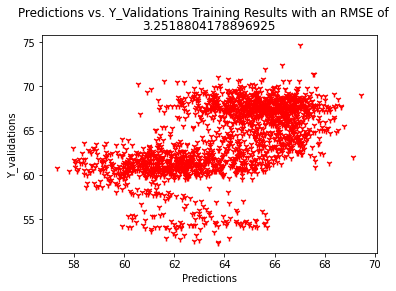

In [970]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x=predictions, y=Y_train, marker="1", color="red")
ax.set_xlabel("Predictions", fontsize=10)
ax.set_ylabel("Y_validations", fontsize=10)
plt.suptitle("Predictions vs. Y_Validations Training Results with an RMSE of")
ax.set_title((mean_squared_error(Y_train, predictions, squared=False)))

# show the plot
plt.show()

In [971]:
#Best R2: 0.064
#Best params:
 #{'alpha': 1, 'l1_ratio': 0.9, 'max_iter': 5}
Model1 = ElasticNet(alpha=1, l1_ratio=-0.9, max_iter=5)
Model1.fit(X_train, Y_train)
predictions = Model1.predict(X_validation)
print(mean_squared_error(Y_validation, predictions, squared=False))#squared=FALSE for RMSE

2.866304623735696


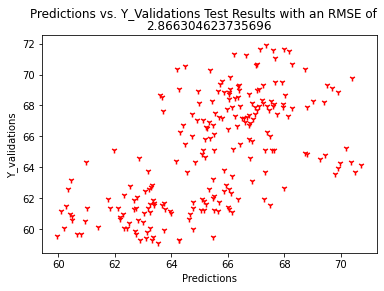

In [972]:
fig, ax = plt.subplots()
ax.scatter(x=predictions, y=Y_validation, marker="1", color="red")
ax.set_xlabel("Predictions", fontsize=10)
ax.set_ylabel("Y_validations", fontsize=10)
ax.set_title((mean_squared_error(Y_validation, predictions, squared=False)))
plt.suptitle("Predictions vs. Y_Validations Test Results with an RMSE of")


# show the plot
plt.show()

# Fit a Neural Network

In [0]:
# let's build our first basic NN!
# see p. 74 or so in Chollet
# note that we haven't standardized our data yet,
# but that's OK for our very first NN

from tensorflow.keras import layers, Sequential

# this simply sets up the model, 
model = Sequential() # like a blank canvas... I'm building a Neural Network
# first hidden layer
model.add(layers.Dense(64, #64 hidden units - 64 representations of data
                       activation='relu', # turns negative numbers into... 0s!
                        input_shape=(X_train.shape[1],))) # specify the input shape (only need once)
# turn off a random 10% of the network at a time (for each weight update)
model.add(layers.Dropout(0.1)) # random 10% turned off

# second hidden layer
model.add(layers.Dense(64, activation='relu')) # 64 representations of data, or nonlinear partial correlations
model.add(layers.Dropout(0.1)) # turn OFF a random 10% of the network to force different branches/weights

# third hidden layer
model.add(layers.Dense(64, activation='relu')) # 64 representations of data, or nonlinear partial correlations
model.add(layers.Dropout(0.1)) # turn OFF a random 10% of the network to force different branches/weights

# fourth hidden layer
model.add(layers.Dense(64, activation='relu')) # 64 representations of data, or nonlinear partial correlations
model.add(layers.Dropout(0.1)) # turn OFF a random 10% of the network to force different branches/weights


# output layer/node
model.add(layers.Dense(1)) # the activation function here is 'linear' by default
# linear allows for predictions between -Inf to Inf

In [0]:
#  this compiles the model, specifies model evaluation metrics
# but doesn't run the model yet
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [975]:
# now run the model!
# let's store this as "history"
history = model.fit(X_train, Y_train,  # train data
          validation_data=(X_validation, Y_validation), # validation data
          epochs=100,  # this is a hyperparameter that can be tuned
          batch_size=10,  # this is a hyperparameter that can be tuned
          verbose=1) # 0 = dont show verbose, 1 = show it!


Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 669.9891 - mae: 18.0597 - val_loss: 53.0441 - val_mae: 6.2738
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 159.1921 - mae: 10.1306 - val_loss: 63.5218 - val_mae: 6.9222
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 113.1030 - mae: 8.4657 - val_loss: 292.1241 - val_mae: 16.8281
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 93.0170 - mae: 7.6244 - val_loss: 278.0630 - val_mae: 16.3060
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 87.0106 - mae: 7.3759 - val_loss: 376.2850 - val_mae: 19.0246
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 78.1499 - mae: 6.9901 - val_loss: 242.6664 - val_mae: 15.1539
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 69.1011 - mae: 6.5228 - val_loss: 510.0192 - val_mae: 22.3013
Epoch 8/100
200/200 [===================

In [976]:
history_dict = history.history
history_dict.keys() 

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

SCATTER PLOT FOR HW RIGHT BELOW

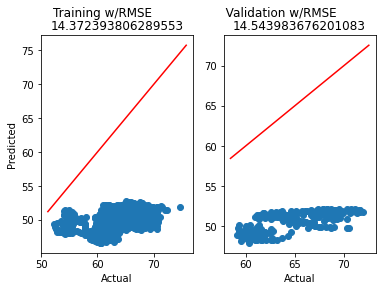

In [977]:
#SCATTERPLOT FOR HW

# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# add a main title across top
#fig.suptitle("My Results", fontsize=20)

# 	val_loss	val_mean_absolute_error	loss	mean_absolute_error

# this makes the individual subplots
# Training Results
axes[0].scatter(x=Y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title((mean_squared_error(Y_train, model.predict(X_train), squared=False)))
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=Y_validation, y=model.predict(X_validation)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)

axes[1].set_title((mean_squared_error(Y_validation, model.predict(X_validation), squared=False)))# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout

fig.suptitle("Training w/RMSE                   Validation w/RMSE    ")
# show the plot
plt.show()

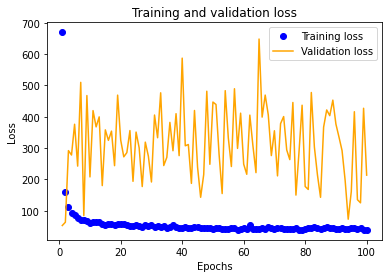

In [978]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) #acc wasn't defined before
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()#IGNORE KEPT FOR FEATURE IMPORTANCE. IT TOOK A LONG TIME TO GET THE FEATURE IMPORTANCE RUNNING SO I'M NOT RISKING IT

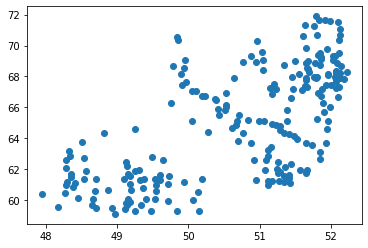

In [979]:
myPreds = model.predict(X_validation)
myActual = Y_validation

# import matplotlib
plt.scatter(myPreds, myActual)#IGNORE KEPT FOR FEATURE IMPORTANCE. IT TOOK A LONG TIME TO GET THE FEATURE IMPORTANCE RUNNING SO I'M NOT RISKING IT

In [980]:
resultsN = model.evaluate(X_validation, Y_validation)
resultsN#IGNORE KEPT FOR FEATURE IMPORTANCE. IT TOOK A LONG TIME TO GET THE FEATURE IMPORTANCE RUNNING SO I'M NOT RISKING IT

7/7 [==============================] - 0s 2ms/step - loss: 212.0274 - mae: 14.2576


[212.02735900878906, 14.257563591003418]

# Feature Importance

In [0]:
from sklearn import datasets
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance

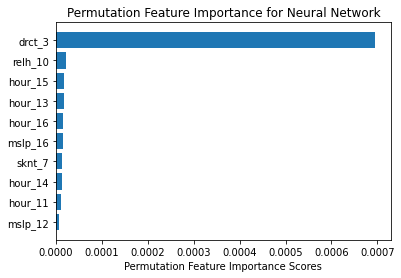

In [982]:
#NEURAL NETWORK MODEL
num=10
# perform permutation importance
results = permutation_importance(model, X, Y, scoring='neg_mean_absolute_error')
# get importance
importance = results.importances_mean
sorted_idx = np.argsort(importance)[-num:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[-num:], importance[sorted_idx], align='center')
plt.yticks(pos[-num:], X.columns[sorted_idx])
plt.xlabel('Permutation Feature Importance Scores')
plt.title('Permutation Feature Importance for Neural Network')
plt.show()

The ten best variables for this model are drct_3, relh_10, hour_15, hour_13, hour_16, mslp_16, sknt_7, hour_14, hour_11, and mslp_12. These can change when run since it is a neural network

The directions were not very clear, but I took the best spotcheck model and added the hyperparmeter tuning that I did to it for this permutation test. I did have all the other models run in it, but it took forever to load.

In [0]:
models = []
models.append(('bestHYPER', ElasticNet(alpha=1, l1_ratio=-0.9, max_iter=5)))

In [984]:
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=False)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

bestHYPER: -0.047051 (0.668882)


In [985]:
for name, model in models:
  exec(f'{name} = model.fit(X_train, Y_train)')
  msg = "Model: %s, Score:%.2f" % (name, model.score(X_train, Y_train))
  print(msg)
  mse = mean_squared_error(Y_validation, model.predict(X_validation))
  print("MSE: %.4f" %mse)
  print('')

Model: bestHYPER, Score:0.30
MSE: 8.2157



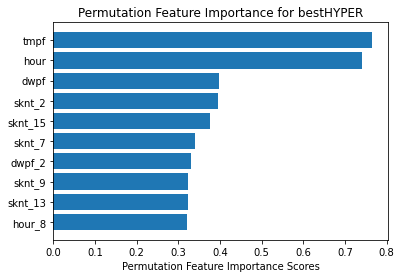

In [986]:
#BEST SPOTCHECK MODEL
for name, model in models:
  if str(model)[:4] != 'bestHYPER':
    # perform permutation importance
    results = permutation_importance(model, X_train, Y_train, scoring='neg_mean_absolute_error')
    # get importance
    importance = results.importances_mean
    sorted_idx = np.argsort(importance)[-num:]
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos[-num:], importance[sorted_idx], align='center')
    plt.yticks(pos[-num:], X.columns[sorted_idx])
    plt.xlabel('Permutation Feature Importance Scores')
    plt.title('Permutation Feature Importance for %s' % name)
    plt.show()


The ten best variables for this model are tmpf, hour, dwpf, sknt_2, sknt_15, sknt_7, dwpf_2, sknt_9, sknt_13, and hour_8. Clearly, sknt and dwpf are important variables from the lag. 

In comparison to the Neural Network permutation test, the variables can change each time the neural model is rerun in totality. In the current permutations, hour is very prevelant towards the top ten for both, with almost no other variables in common.

Permutation testing works by randomly shuffling one variable, seperating the feature from the target variable in a sense of relationship. With this relationship broken, a drop in model score (which depends on how you score your model) can be seen from the removal of this shuffled variable, showing the dependence the model has on this feature instead of just the significance of it.

# Analysis

  One thing I absolutely learned from this assignment is that it is incredibly important to keep track of the dataframes and models I am using, as I ran into issues with this when it came time to implement the feature importance section of the assignment because I had used the same name for model in the Neural Network section and had to re-apply the code again so that a feature permutation importance could be run for the hyper parameter model I got from my spotcheck. Also, the feature permutation importance testing is such a valuable method to use when needing to see how important variables are to a model, and shows another perspective on how a model can improve instead of solely relying on p-value methodologies. From this assignment I also learned not only how to properly implement lag variables, which I learned can 100% be done wrong if not concanated properly, but also how they can drastically increase the dependence of time variables. From the spotcheck model hyperparameter tuning I learned that hyperparameter tuning might not actually guarantee model improvement, something I can consider in the future when exploring data and perhaps crunched for time either in a professional or academic setting. Finally, outside of learning that Dave keep records of his home temperature, I learned that I have to further educate myself on model types and data target variables as I had a difficult time implementing models outside of regression analysis into my assignment due to not knowing if it would be applicable for classification recoding, but it truly comes down to gaining better comfort with modeling so I do not have to hesitate in this regard.